## Análise das vendas de produtos no Wish - Solução

Você foi contratado por uma empresa que planeja revender produtos no Wish. Seu objetivo vai ser ajudá-los a entender que fatores são os mais importantes para definir o sucesso de determinados produtos dentro da plataforma. Utilize as ferramentas estudadas até aqui para tirar insights e auxiliar a empresa do ponto de vista estratégico.

https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### Perguntas possíveis

- Produtos com maior discrepância entre preço real e de retail vendem mais?
- Ad boost aumentam as vendas?
- Avaliações melhores aumentam vendas?
- Badges importam?
- Quantidade de tags auxiliam vendas?
- Tags com maiores vendas?
- Tempo de existência do produto
- Shipping analysis
- Todos os produtos contém fotos?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_products = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df_products

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [4]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
[i for i in df_products.columns]

['title',
 'title_orig',
 'price',
 'retail_price',
 'currency_buyer',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'tags',
 'product_color',
 'product_variation_size_id',
 'product_variation_inventory',
 'shipping_option_name',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_id',
 'merchant_has_profile_picture',
 'merchant_profile_picture',
 'product_url',
 'product_picture',
 'product_id',
 'theme',
 'crawl_month']

In [6]:
cols = ['title_orig',
 'price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'tags',
 'product_color',
 'product_variation_size_id',
 'product_variation_inventory',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'origin_country'
 ]

## 1. Análise da qualidade dos dados

In [7]:
df_products = df_products[cols]

In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_orig                   1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   units_sold                   1573 non-null   int64  
 4   uses_ad_boosts               1573 non-null   int64  
 5   rating                       1573 non-null   float64
 6   rating_count                 1573 non-null   int64  
 7   badges_count                 1573 non-null   int64  
 8   badge_local_product          1573 non-null   int64  
 9   badge_product_quality        1573 non-null   int64  
 10  badge_fast_shipping          1573 non-null   int64  
 11  tags                         1573 non-null   object 
 12  product_color                1532 non-null   object 
 13  product_variation_

### 1.1. Análise de dados ausentes

In [9]:
df_products.isna().sum()

title_orig                        0
price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
merchant_rating_count             0
merchant_rating                   0
origin_country                   17
dtype: int64

As colunas "product_color", "product_variation_size_id", "has_urgency_banner" e "origin_country" possuem dados problemáticos.

In [10]:
df_products.loc[df_products["product_color"].isna(), "product_color"] = ""
df_products.loc[df_products["product_variation_size_id"].isna(), "product_variation_size_id"] = ""
df_products.loc[df_products["has_urgency_banner"].isna(), "has_urgency_banner"] = 0

In [11]:
df_products.isna().sum()

title_orig                      0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
merchant_rating_count           0
merchant_rating                 0
origin_country                 17
dtype: int64

### 1.2. Qual das colunas são categóricas e quais são numéricas?

In [12]:
df_products.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.018436,0.074380,0.012715,33.081373,0.002543,40.456453,49.821360,0.300699,2.649583e+04,4.032345
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.134565,0.262472,0.112075,21.353137,0.050379,20.301203,2.562799,0.458708,7.847446e+04,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.333333
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,31.000000,50.000000,0.000000,1.987000e+03,3.917353
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,40.000000,50.000000,0.000000,7.936000e+03,4.040650
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.161797
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000


In [13]:
categorical_cols = [i for i in cols if i not in df_products.describe().columns]
numerical_cols = df_products.describe().columns
categorical_cols

['title_orig',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

In [14]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

## 2. Análise exploratória dos dados

### 2.1. Análise de distribuição dos dados

#### 2.1.1 Dados categóricos

In [15]:
categorical_cols

['title_orig',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\1261267528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_color', data=df_products, order=product_color_counts.index, palette="cividis")


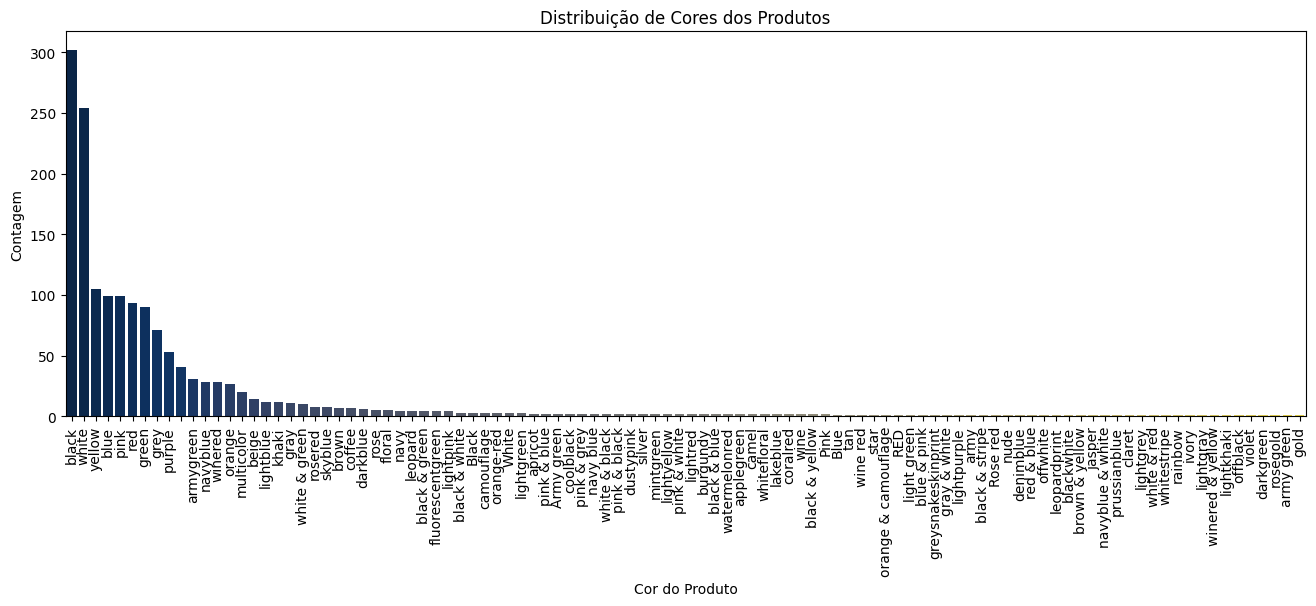

In [16]:
product_color_counts = df_products['product_color'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x='product_color', data=df_products, order=product_color_counts.index, palette="cividis")
plt.xticks(rotation=90)
plt.title('Distribuição de Cores dos Produtos')
plt.xlabel('Cor do Produto')
plt.ylabel('Contagem')
plt.show()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\1041492650.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_products, palette="cividis")


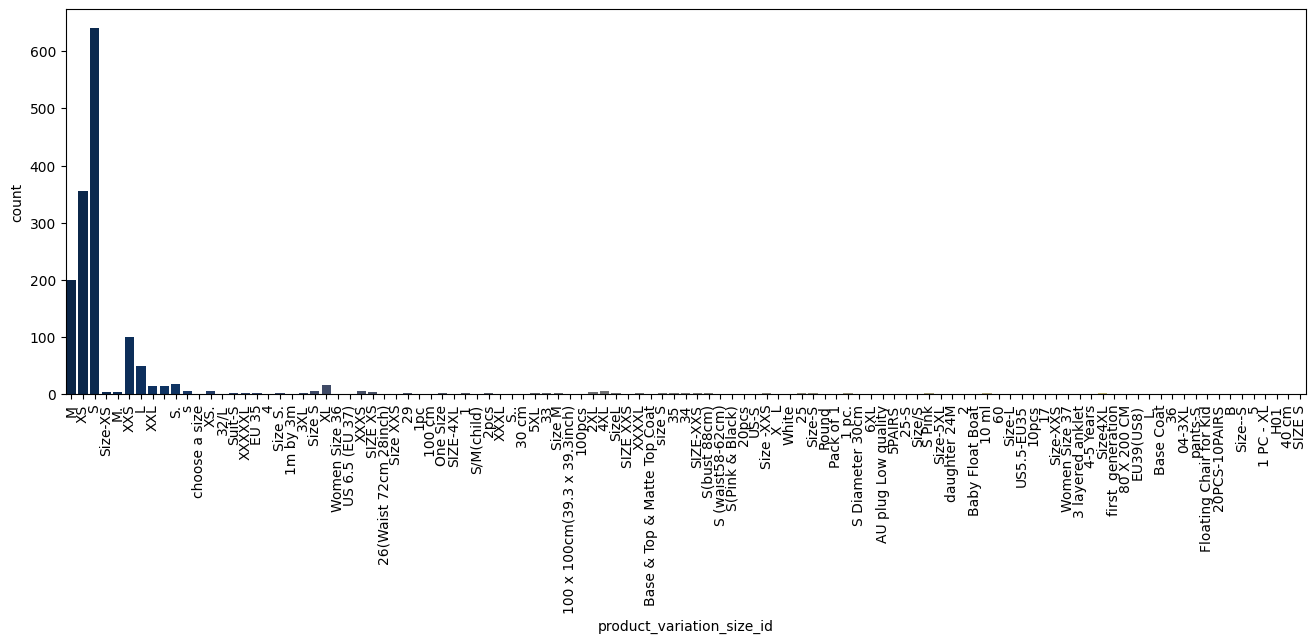

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\1041492650.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_products, palette="cividis")


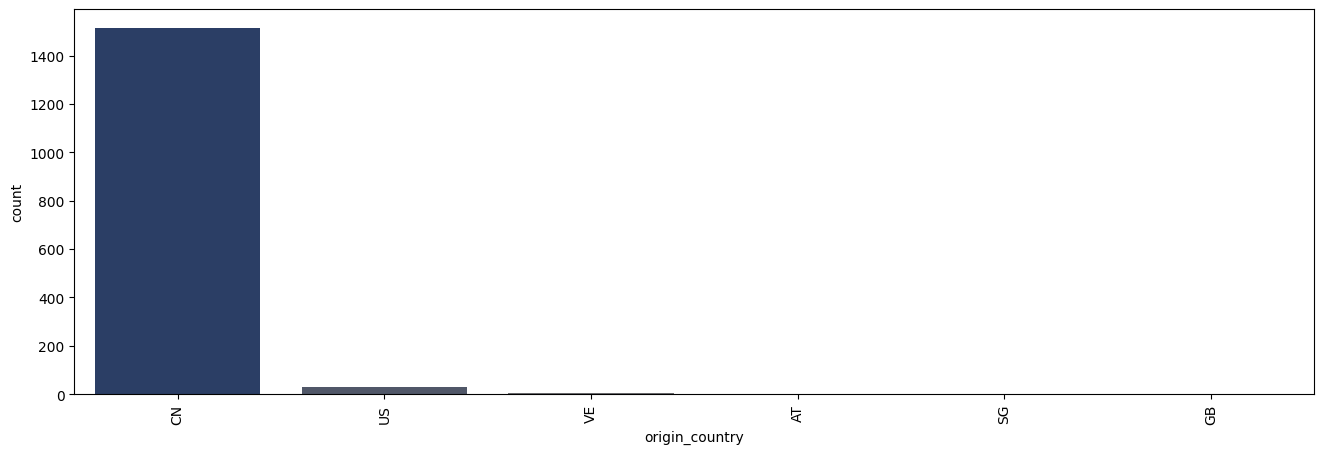

In [17]:
for col in categorical_cols:
    if col not in ['title_orig', 'tags', 'product_color']:
        fig, ax = plt.subplots(figsize=(16, 5))
        sns.countplot(x=col, data=df_products, palette="cividis")
        plt.xticks(rotation=90)
        plt.show()

#### 2.1.2. Dados numéricos

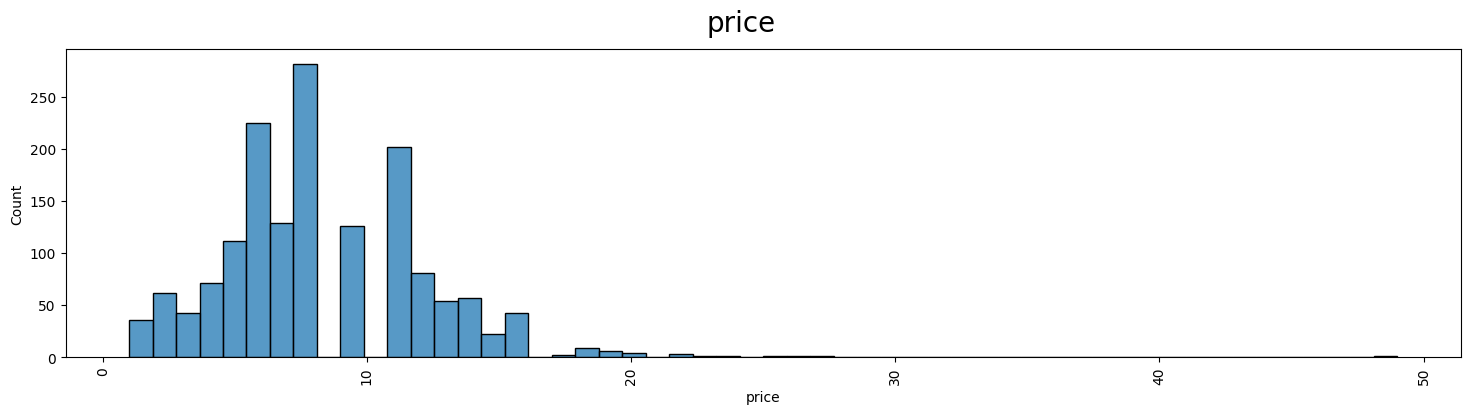

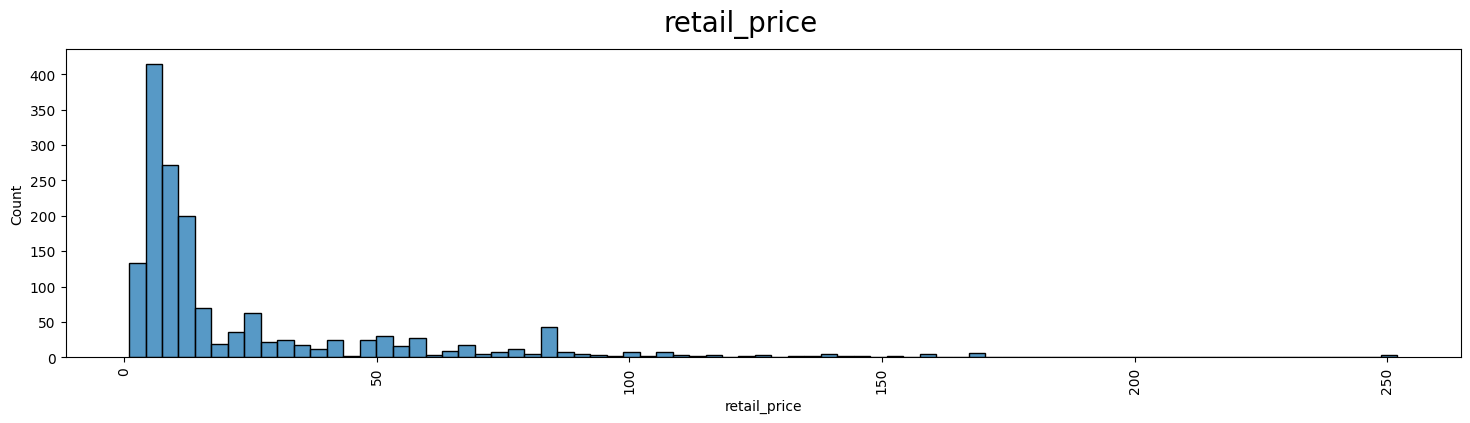

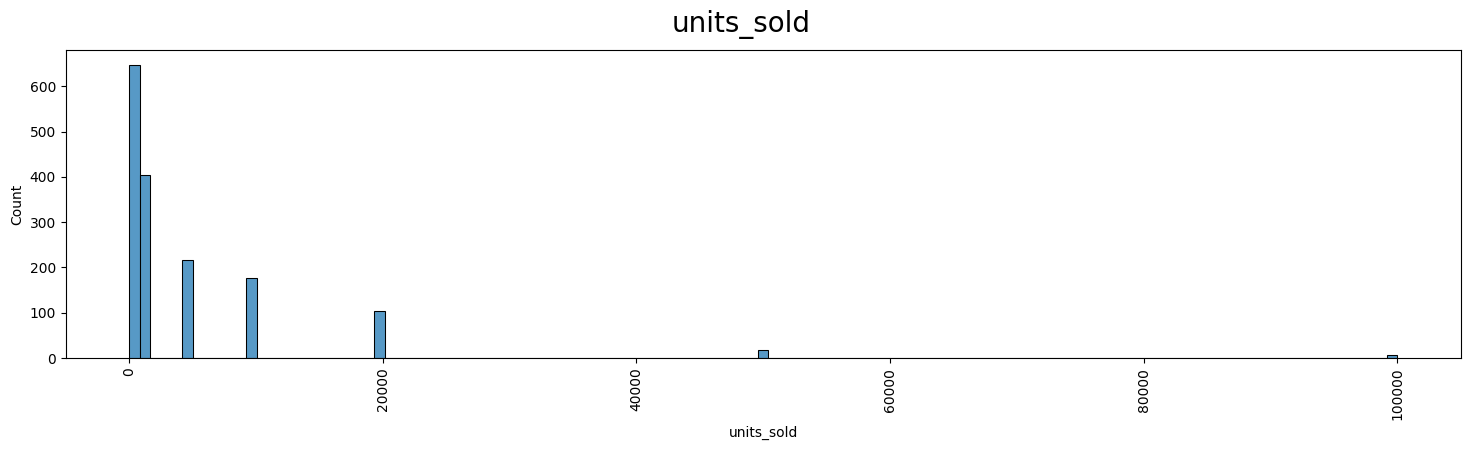

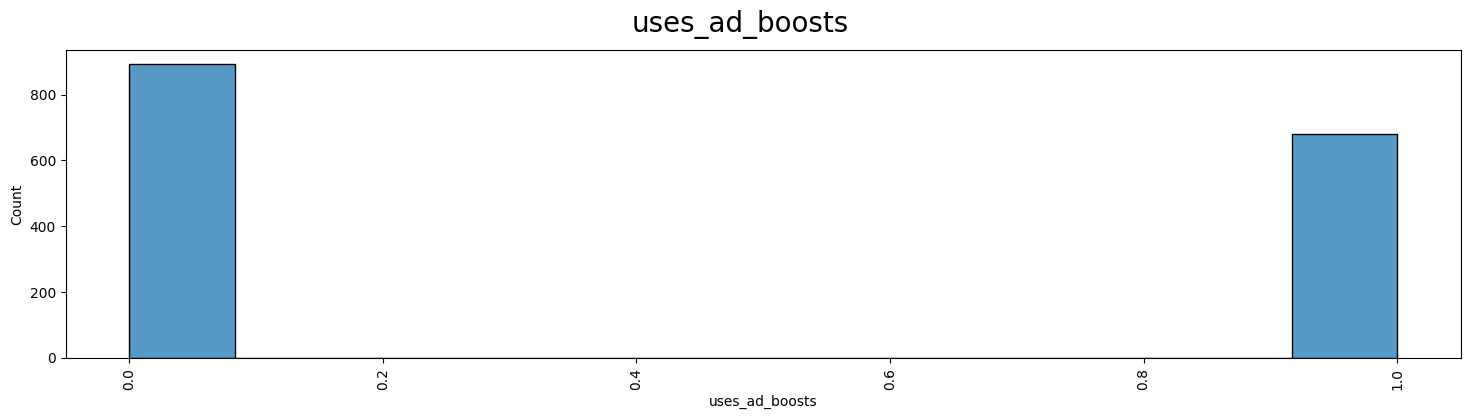

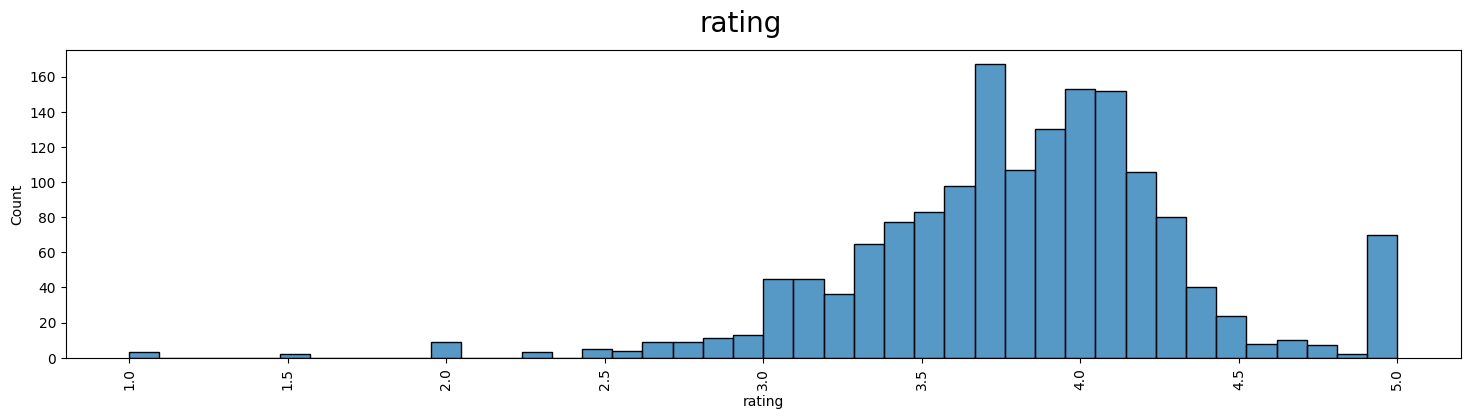

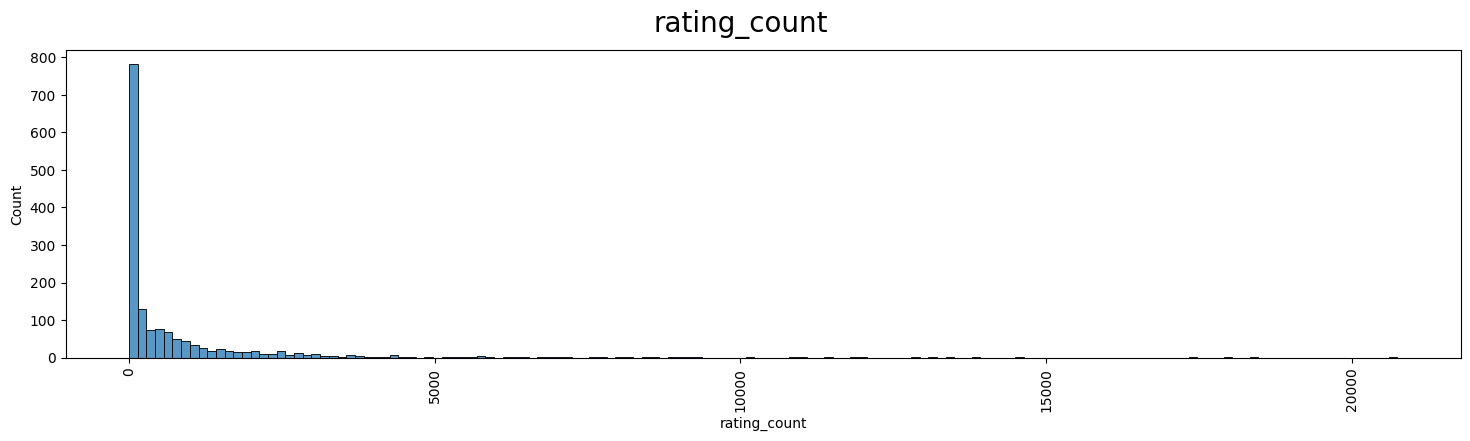

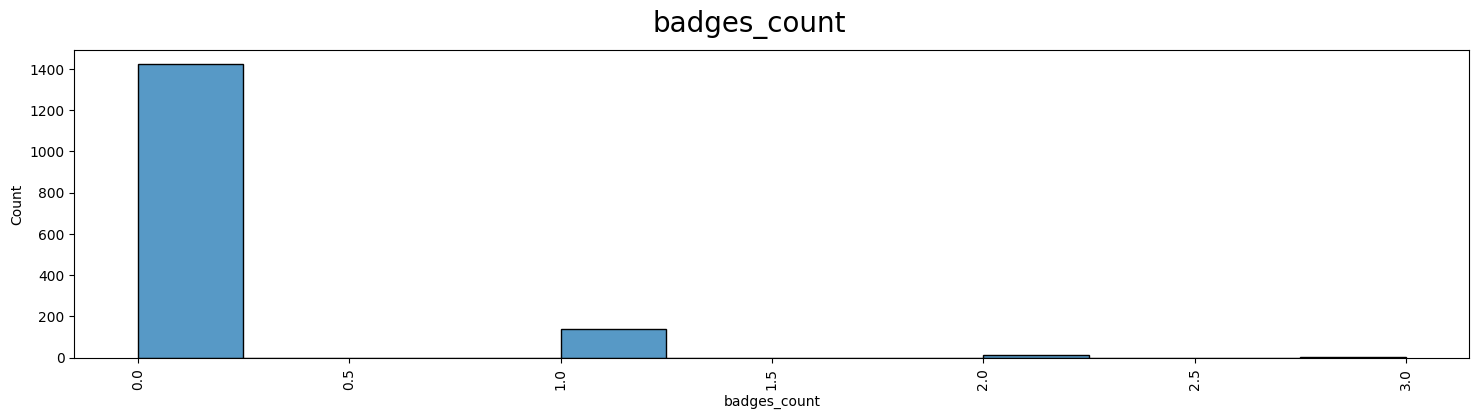

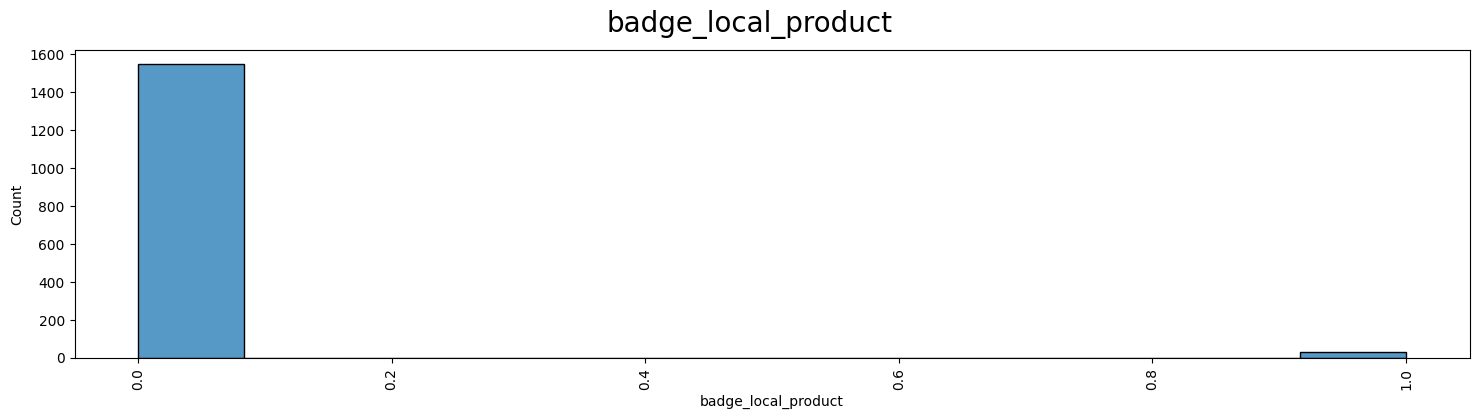

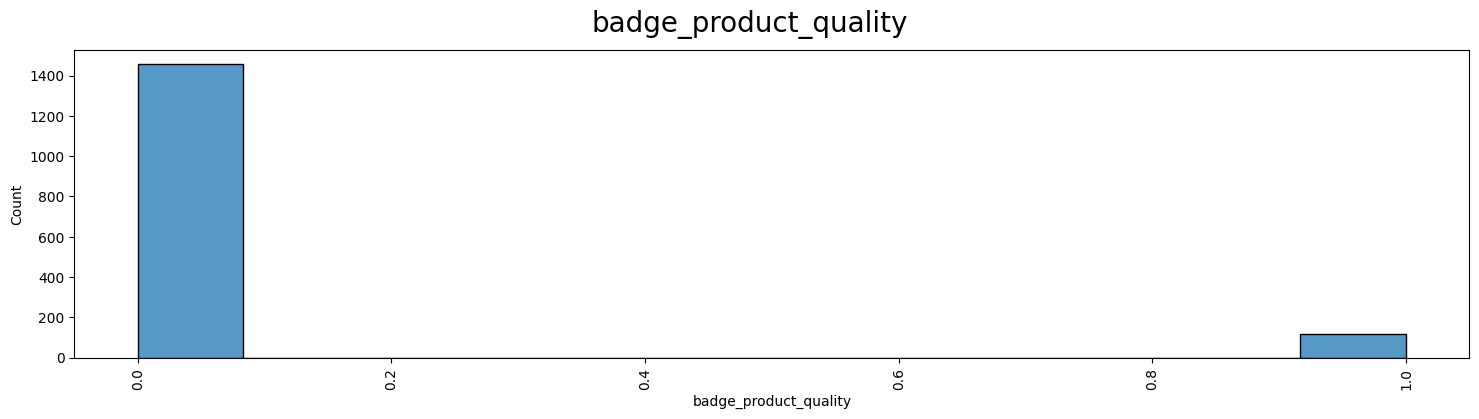

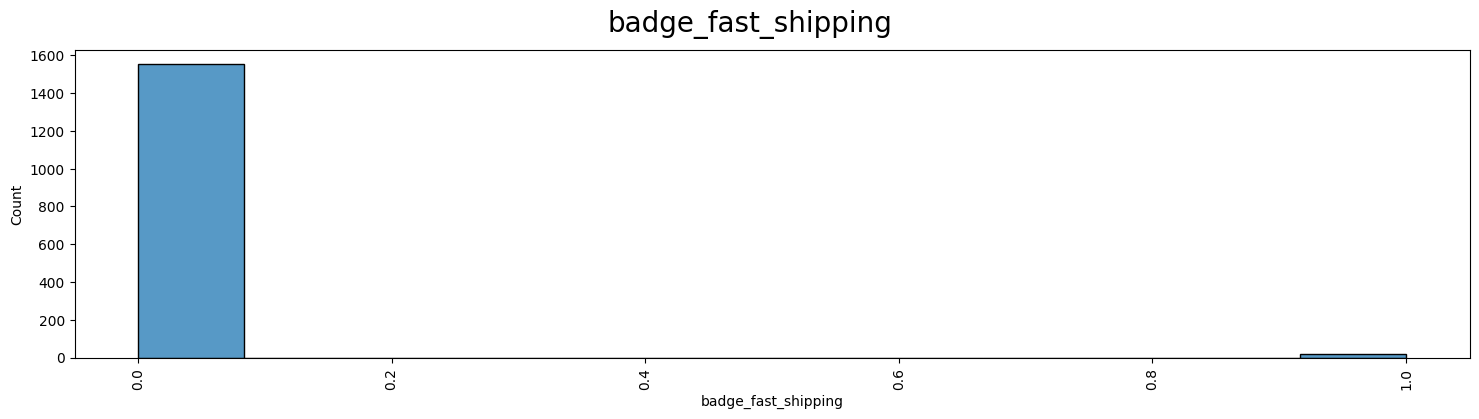

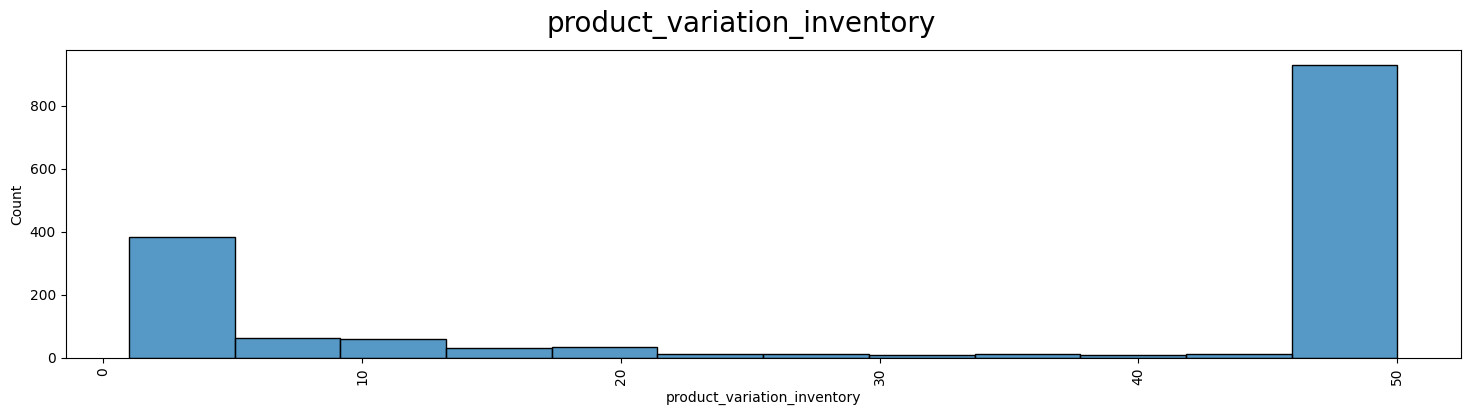

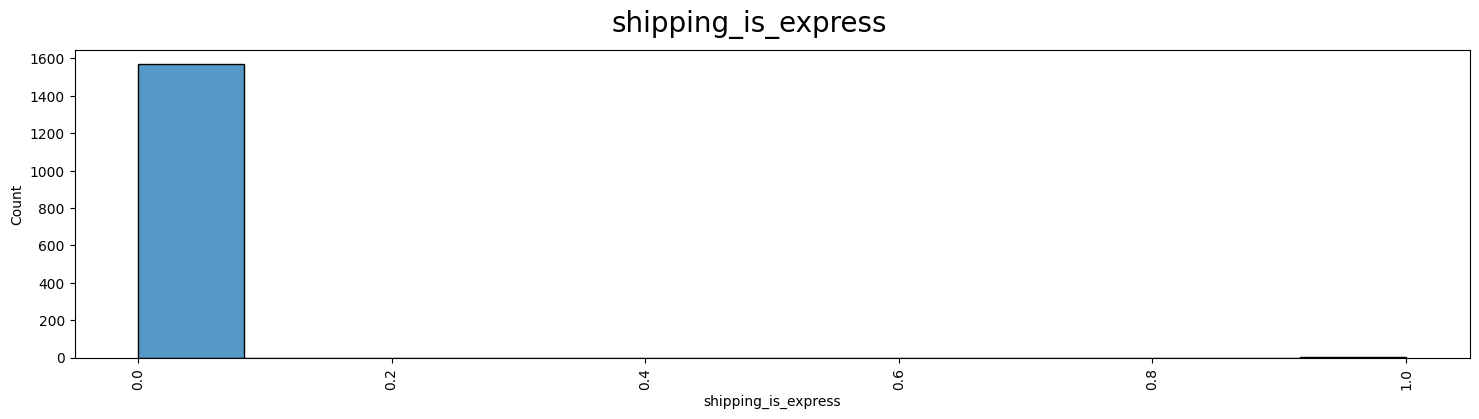

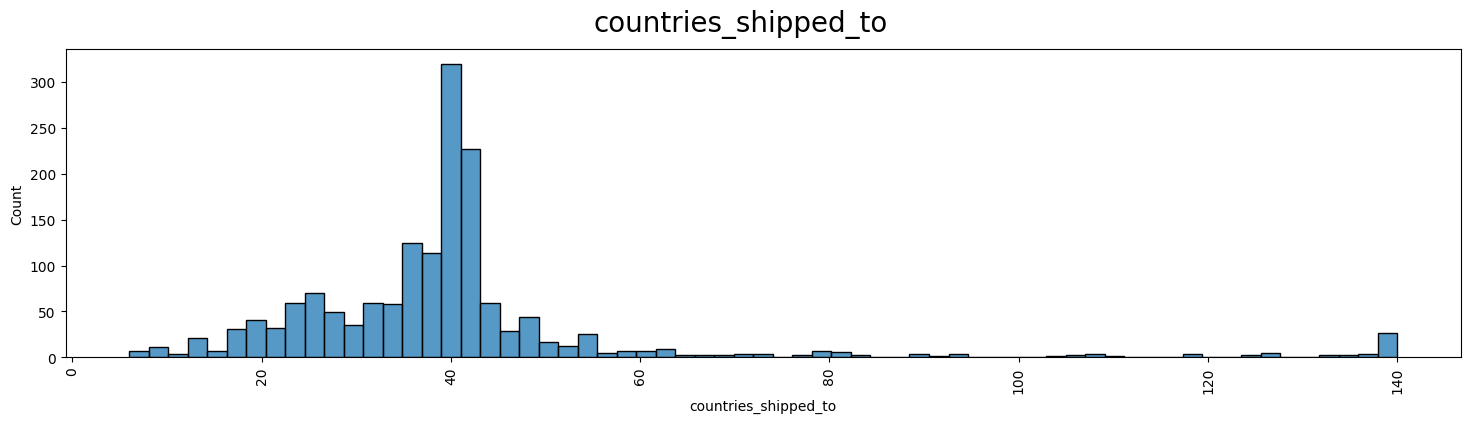

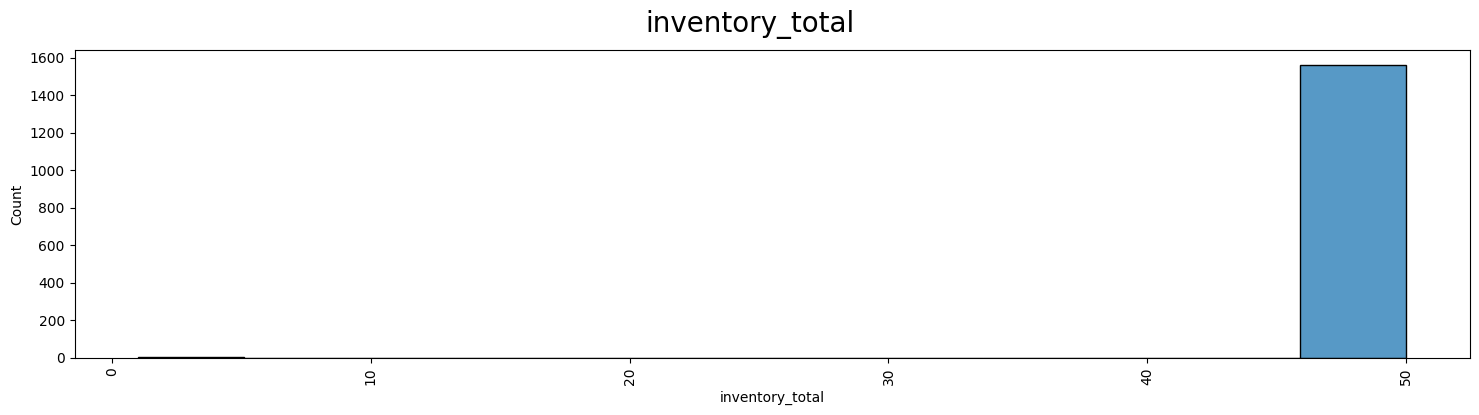

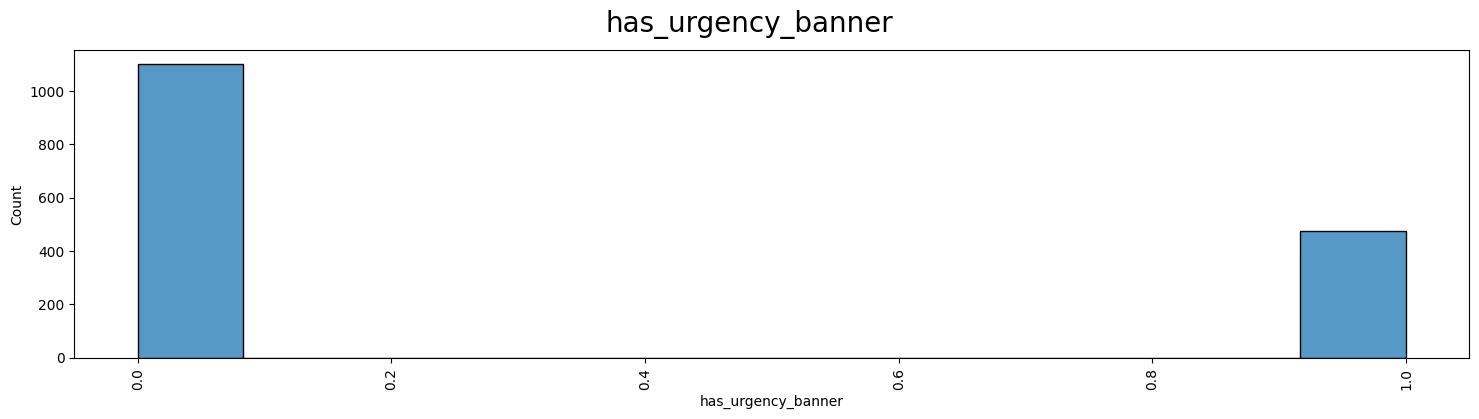

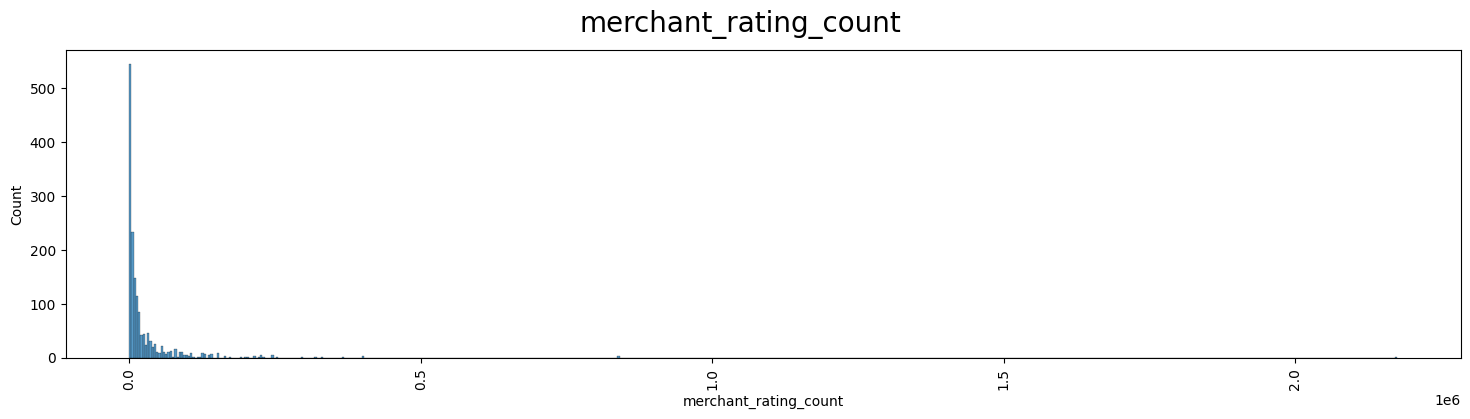

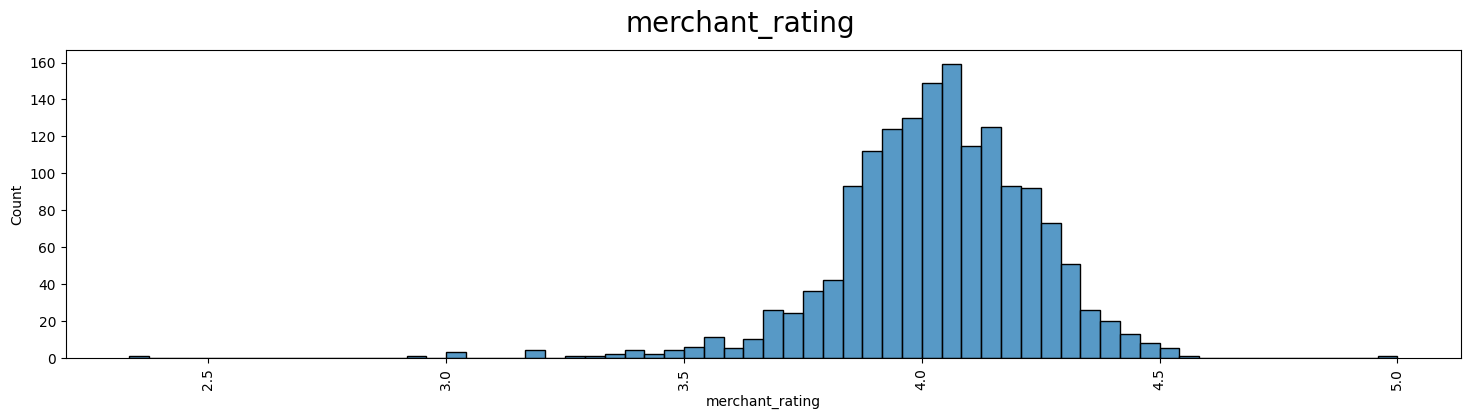

In [18]:
for col in numerical_cols:
    f, axes = plt.subplots(1,1,figsize=(18,4))
    sns.histplot(x=col, data=df_products)
    plt.xticks(rotation=90)
    plt.suptitle(col,fontsize=20)
    plt.show()

#### 2.1.3. Ajuste fino das colunas "tag" e "units sold"

**Units_sold**

In [19]:
df_products.loc[df_products['units_sold']< 10, 'units_sold'] = 10
df_products['units_sold'].value_counts()

units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: count, dtype: int64

<Axes: xlabel='units_sold', ylabel='Count'>

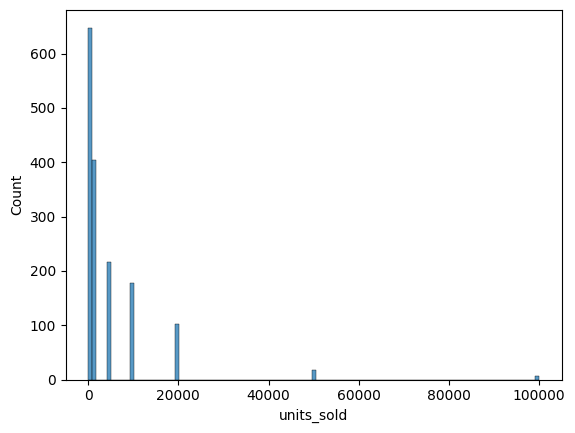

In [20]:
sns.histplot(df_products['units_sold'])

In [21]:
df_products['units_sold'].median()

1000.0

In [22]:
df_products['units_sold'].mean()

4339.052765416402

Como a mediana das vendas é 1000, vamos tentar entender que produtos ficaram acima desse patamar e quais ficaram abaixo.

In [23]:
df_products['income'] = df_products['price'] * df_products['units_sold']

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\1601391763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['income'] = df_products['price'] * df_products['units_sold']


<Axes: xlabel='income', ylabel='Count'>

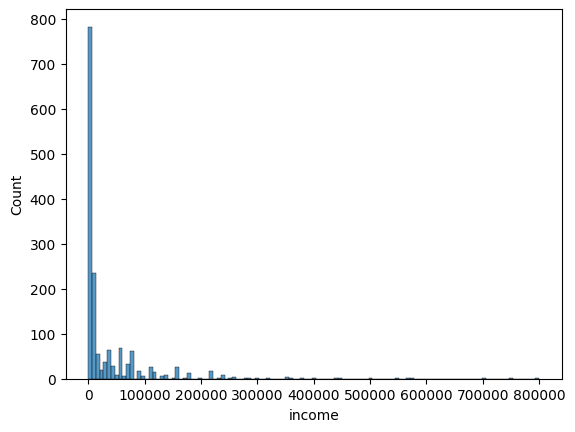

In [24]:
sns.histplot(df_products['income'])

In [25]:
df_products['income'].median()

7000.0

In [26]:
df_products['income'].mean()

35211.941703750796

**Tag**

In [27]:
from wordcloud import WordCloud, STOPWORDS

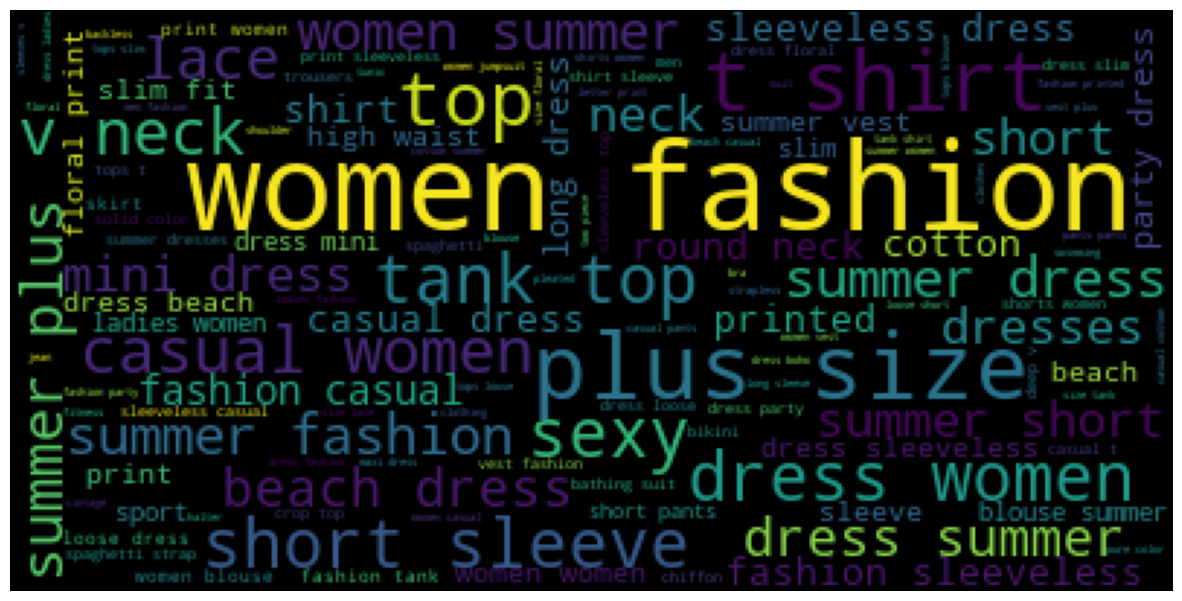

In [28]:
word_string = " ".join(df_products['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
df_products["income"] = df_products["price"] * df_products["units_sold"]

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\3185509078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["income"] = df_products["price"] * df_products["units_sold"]


In [30]:
df_products['success'] = 0
df_products.loc[df_products['income']> 7000, "success"] = 1

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\2001114103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['success'] = 0


In [31]:
df_products['success'].value_counts()

success
0    809
1    764
Name: count, dtype: int64

### 2.2. Análise de produtos "campeões"

#### Produtos com maior diferença entre "retail_price" e "price" vendem mais?**

In [32]:
df_products.loc[:, 'discount'] = df_products['retail_price'] - df_products['price']

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\2294927982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products.loc[:, 'discount'] = df_products['retail_price'] - df_products['price']


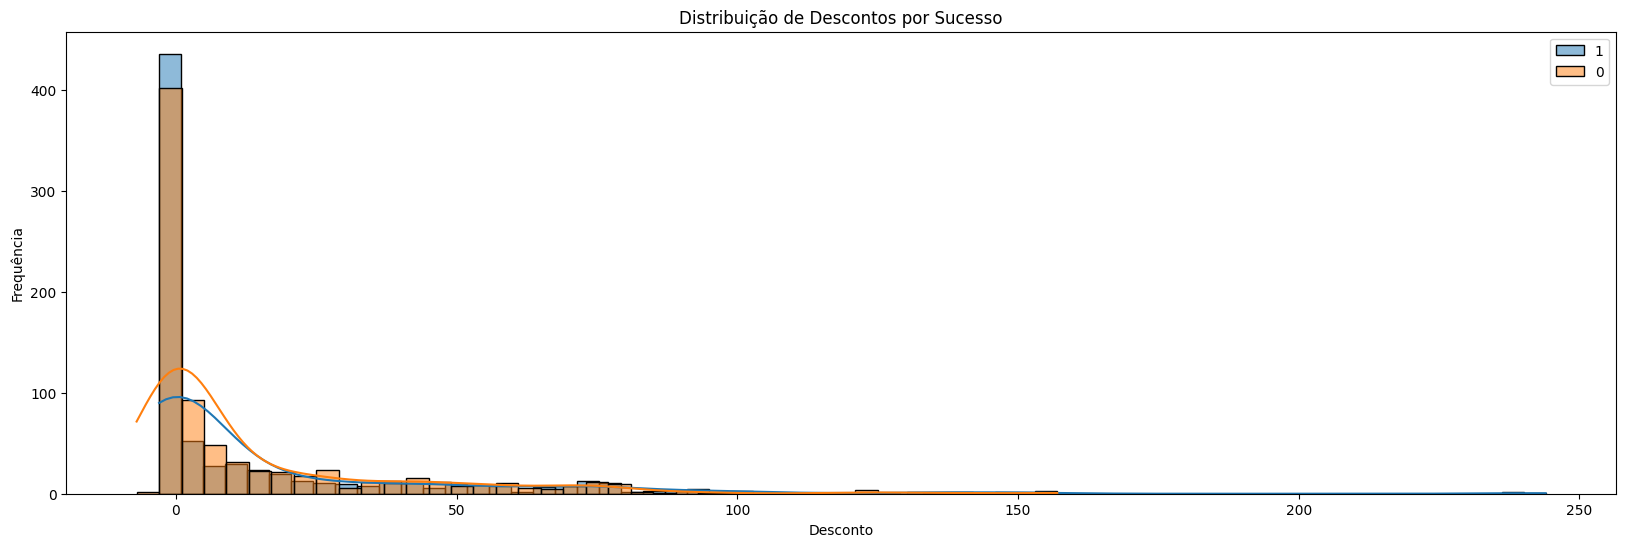

In [33]:
fig, ax = plt.subplots(figsize = (20,6))

sns.histplot(df_products.loc[df_products['success'] == 1, 'discount'], label="1", kde=True, ax=ax)
sns.histplot(df_products.loc[df_products['success'] == 0, 'discount'], label="0", kde=True, ax=ax)

plt.legend()
plt.title('Distribuição de Descontos por Sucesso')
plt.xlabel('Desconto')
plt.ylabel('Frequência')
plt.show()

#### Ad boost aumentam as vendas?

In [34]:
df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts()

uses_ad_boosts
0    441
1    368
Name: count, dtype: int64

In [35]:
df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts()

uses_ad_boosts
0    451
1    313
Name: count, dtype: int64

#### Avaliações melhores aumentam vendas?


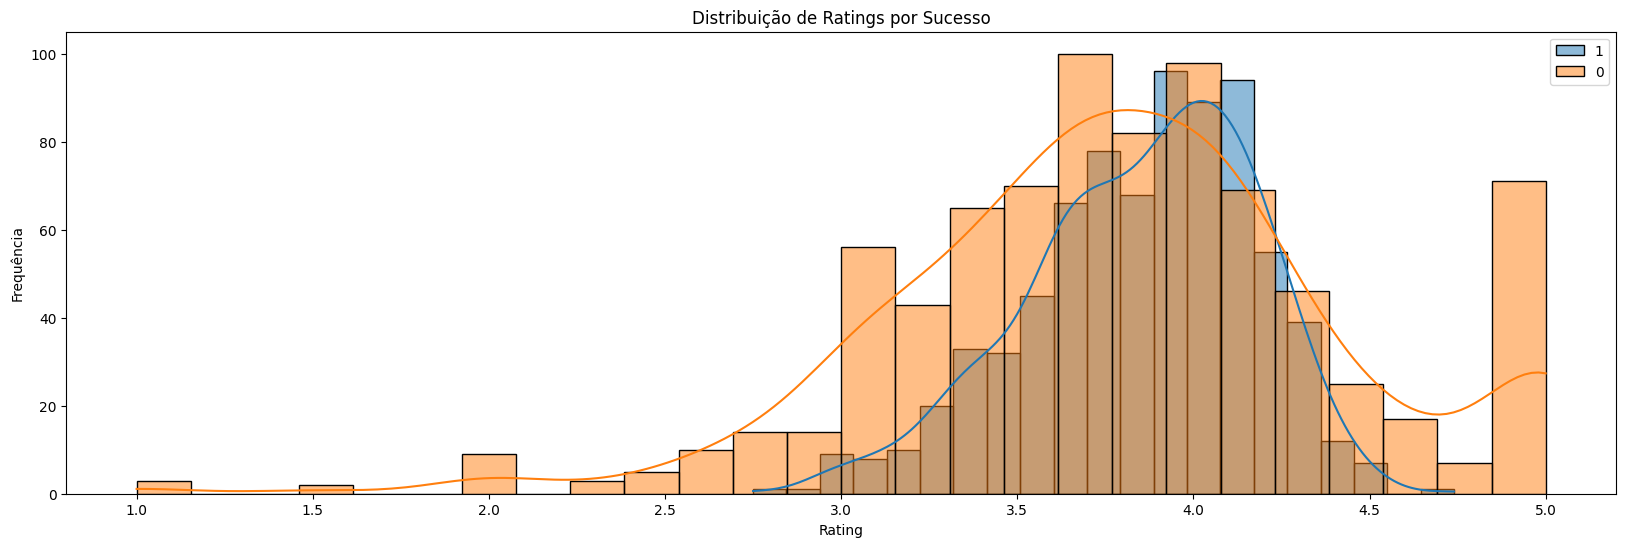

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plotar a distribuição de 'rating' para produtos com 'success' igual a 1
sns.histplot(df_products.loc[df_products['success'] == 1, 'rating'], label="1", kde=True)

# Plotar a distribuição de 'rating' para produtos com 'success' igual a 0
sns.histplot(df_products.loc[df_products['success'] == 0, 'rating'], label="0", kde=True)

plt.legend()
plt.title('Distribuição de Ratings por Sucesso')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.show()

In [37]:
df_products.loc[df_products['success'] == 1, 'rating'].mean()

3.853625654450262

In [38]:
df_products.loc[df_products['success'] == 0, 'rating'].mean()

3.789987639060569

#### Badges importam?

In [39]:
df_products.groupby(['success', "badges_count"]).count()[['title_orig']].pivot_table(index='success', columns='badges_count')

title_orig                
badges_count          0     1    2    3
success                                
0                 753.0  48.0  8.0  NaN
1                 669.0  90.0  3.0  2.0

#### Quantidade de tags auxiliam vendas?

In [40]:
df_products.loc[:,'tags_count'] = df_products['tags'].apply(lambda x: len(x.split(',')))

C:\Users\Jorge\AppData\Local\Temp\ipykernel_5984\2561279006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products.loc[:,'tags_count'] = df_products['tags'].apply(lambda x: len(x.split(',')))


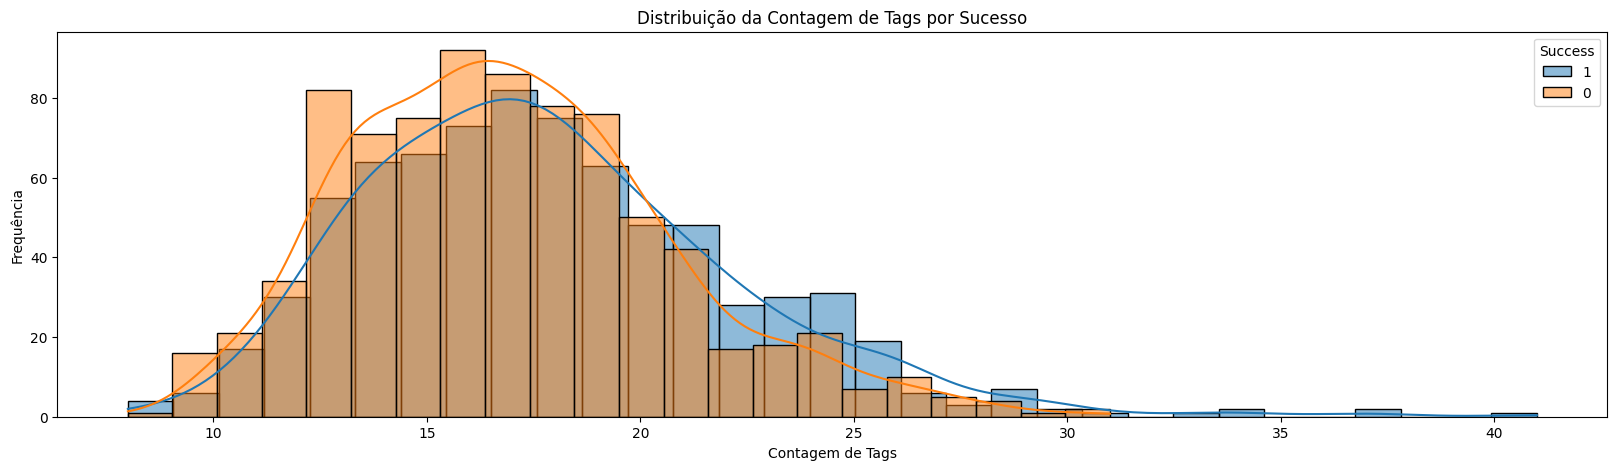

In [41]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="1", kde=True, ax=ax)
sns.histplot(df_products.loc[df_products["success"] == 0, "tags_count"], label="0", kde=True, ax=ax)
plt.legend(title='Success')
plt.title('Distribuição da Contagem de Tags por Sucesso')
plt.xlabel('Contagem de Tags')
plt.ylabel('Frequência')
plt.show()

#### Shipping analysis

## 3. Machine Learning

In [42]:
from sklearn.model_selection import train_test_split

model_cols = ['price', 'retail_price', 
       'uses_ad_boosts', 'rating', 'badges_count',
       'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 
       'merchant_rating', 'discount', 'tags_count']

In [43]:
x = df_products[model_cols]
y = df_products["success"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
rf_model = grid_search.best_estimator_

In [47]:
x_test.iloc[0].to_frame().transpose()

,price,retail_price,uses_ad_boosts,rating,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating,discount,tags_count
920,2.7,3.0,1.0,4.13,0.0,0.0,0.0,1.0,0.0,33.0,50.0,0.0,4.108849,0.3,19.0


In [48]:
rf_model.predict(x_test.iloc[0].to_frame().transpose())

array([0], dtype=int64)

In [49]:
y_test.iloc[0]

1

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       231
           1       0.80      0.73      0.77       241

    accuracy                           0.77       472
   macro avg       0.78      0.77      0.77       472
weighted avg       0.78      0.77      0.77       472

[[188  43]
 [ 64 177]]


<Axes: >

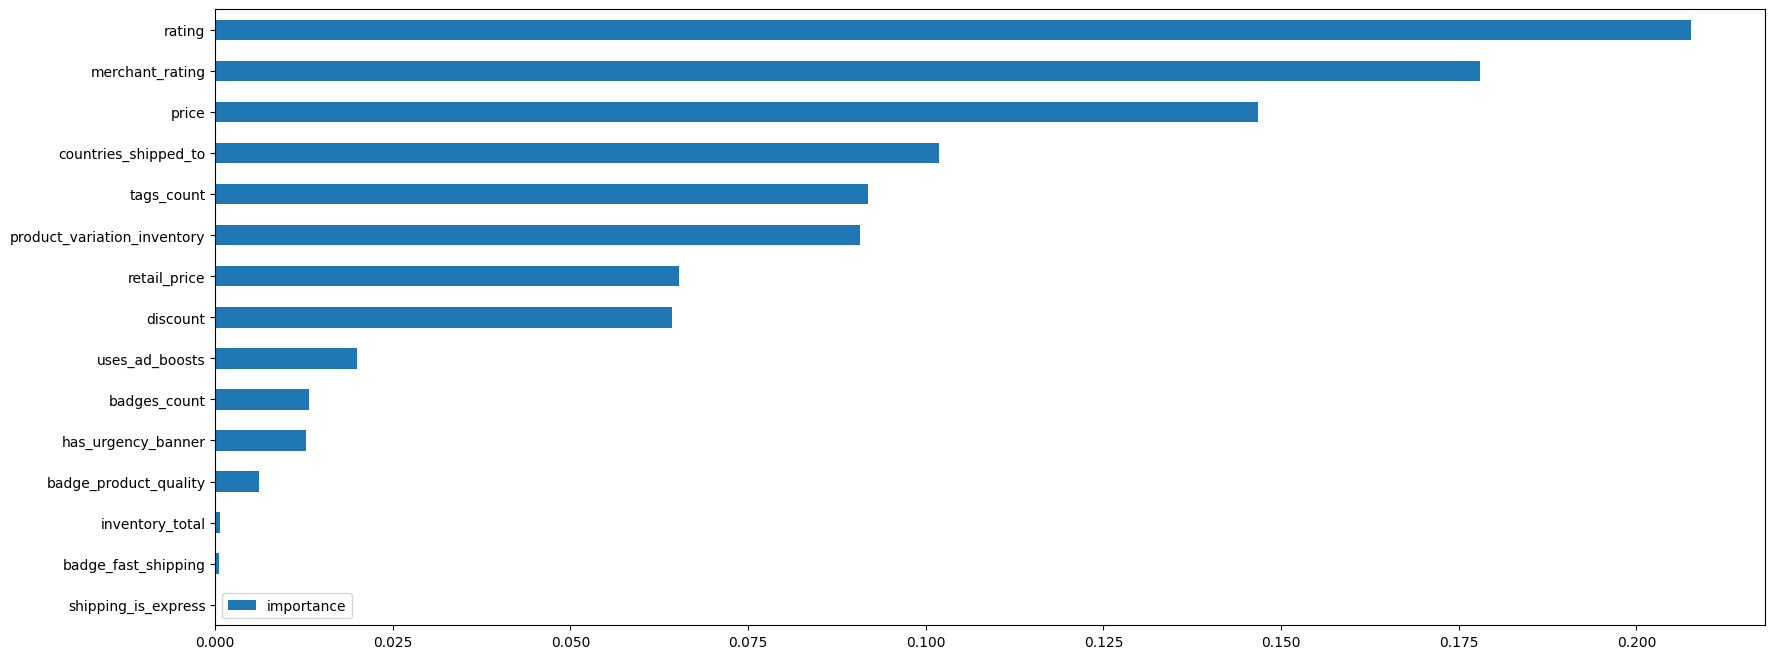

In [51]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)

#### Modelo Melhorado

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import randint

In [77]:
model_cols = ['price', 'retail_price', 'uses_ad_boosts', 'rating', 'badges_count',
              'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory',
              'shipping_is_express', 'countries_shipped_to', 'inventory_total',
              'has_urgency_banner', 'merchant_rating', 'discount', 'tags_count']

x = df_products[model_cols]
y = df_products["success"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [78]:
smote = SMOTE(random_state=42, k_neighbors=5)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': randint(1, len(model_cols)),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [69]:
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D47CA42010>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D47CA43150>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D47CA41D50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D47CA40CD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D47CA41890>},
                   random_state=42, verbose=2)

In [70]:
best_rf_model = random_search.best_estimator_

In [71]:
y_pred = best_rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       253
           1       0.74      0.76      0.75       219

    accuracy                           0.76       472
   macro avg       0.76      0.76      0.76       472
weighted avg       0.77      0.76      0.77       472

[[194  59]
 [ 52 167]]


In [72]:
# Feature Importance
feature_importances = pd.DataFrame(best_rf_model.feature_importances_,
                                   index=x.columns,
                                   columns=['importance']).sort_values('importance', ascending=True)

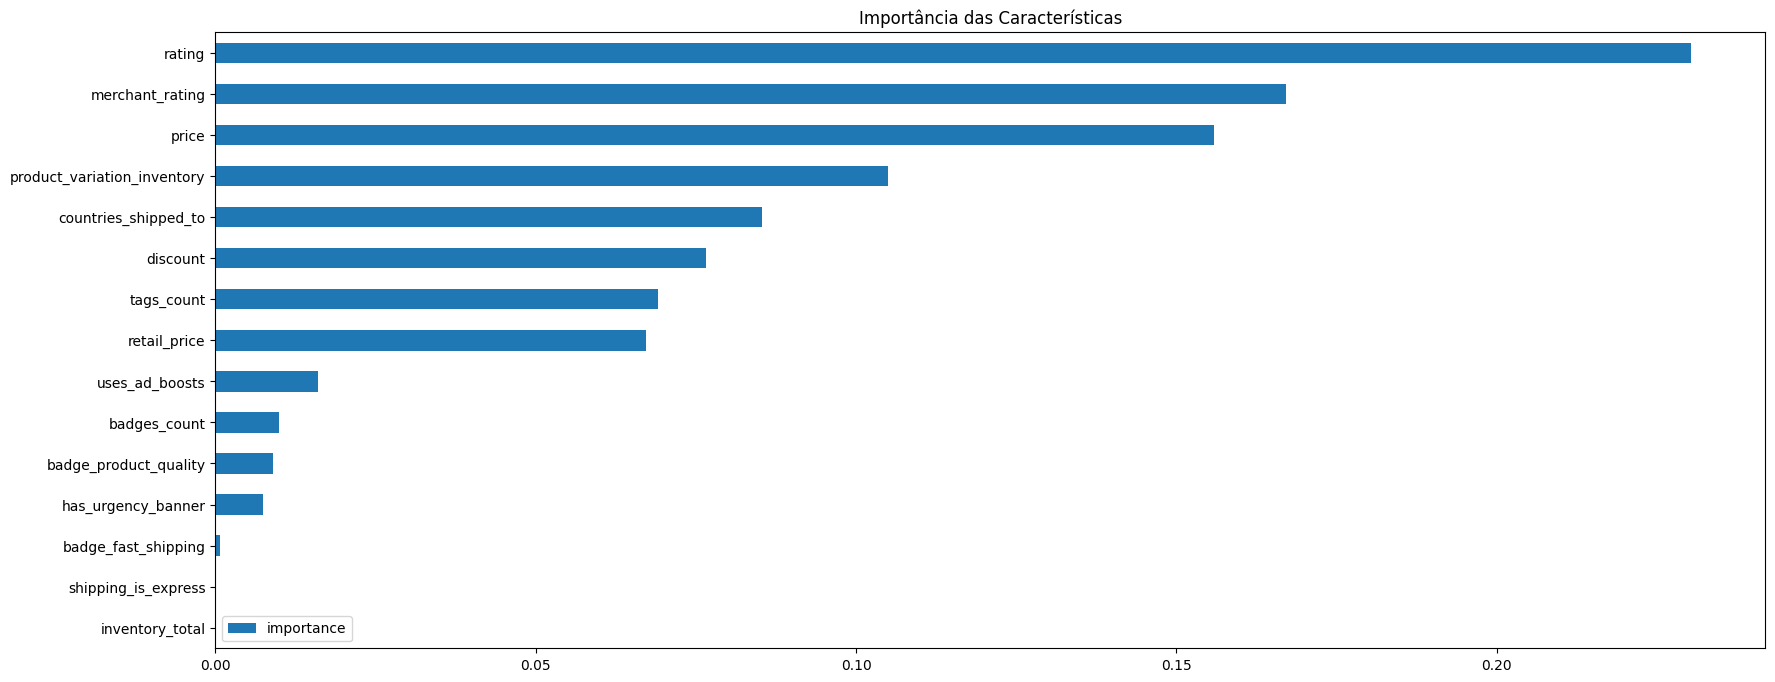

In [73]:
fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)
plt.title('Importância das Características')
plt.show()